<a href="https://colab.research.google.com/github/MOPURISUSMITHA/-Various-Classification-Techniques-for-Credit-Card-Fraud-Detection/blob/main/Final_Implementation_Credit_card_fraud_detection_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD DETECTION USING CLASSIFICATION ALGORITHMS IN MACHINE LEARNING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

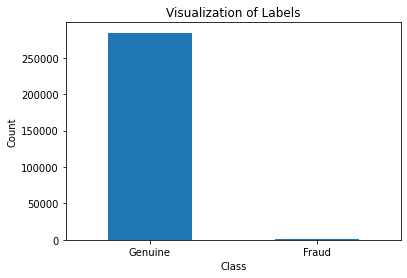

In [ ]:
labels = ["Genuine", "Fraud"]
count_classes = credit_card_data.value_counts(credit_card_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)


(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7549,10362.0,0.950605,-0.325516,1.220609,1.639310,-0.929900,0.247928,-0.729555,0.203049,2.255058,-0.484546,0.156019,-3.028311,-0.039251,1.573677,0.302175,0.057109,0.693229,0.261192,-1.063954,-0.138214,0.035148,0.267389,-0.105165,-0.001905,0.317100,-0.255386,0.028895,0.038127,96.00,0
64201,51074.0,-1.689893,0.534608,1.455006,-0.835360,0.400121,-0.465372,0.213840,0.582153,-0.439897,-1.168664,1.051905,1.580138,0.295497,0.142660,-1.981301,0.193935,-0.359028,-0.803235,-1.476990,-0.334542,0.018809,-0.133194,-0.215140,0.259617,0.085054,-0.061952,-0.202564,-0.037376,1.18,0
40116,40101.0,1.317229,-0.638296,-0.499229,-0.908839,-0.271677,-0.227060,-0.165056,-0.157170,-1.285280,0.834069,0.216754,0.308476,0.690660,0.322124,0.063680,-0.929389,-0.636673,1.572059,0.033964,-0.268432,-0.422171,-0.910097,-0.173867,-0.799922,0.425294,1.056987,-0.092932,-0.007722,80.00,0
254383,156705.0,-0.088545,0.497533,0.217249,-0.189876,-0.210962,0.423544,0.126200,-1.759752,0.347516,-0.656681,-0.855381,0.606161,0.620904,0.112437,0.489379,-0.183898,-0.281630,-0.165729,0.019252,-0.341818,1.529075,-0.437209,-0.537058,0.648187,0.858071,-0.192485,0.322523,0.222055,176.18,0
24752,33365.0,-0.608050,0.655786,1.688528,-1.356462,-0.475388,-0.308321,-0.156148,-1.867834,-1.307856,0.454488,0.398941,-0.158065,0.877240,-0.510550,0.687222,0.566608,0.624183,-2.067403,0.253021,-0.133154,1.560979,-0.301638,0.172326,0.376158,-0.227224,-0.468718,-0.005261,-0.149731,9.95,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,92369.069106,0.156499,-0.046951,-0.040418,-0.042767,-0.008855,-0.028404,-0.054070,0.036332,-0.072205,-0.009452,0.067030,0.018935,0.009827,0.018413,-0.023537,0.082917,0.051104,-0.023158,0.009896,-0.035945,0.046002,-0.058356,-0.018522,0.043272,0.007172,0.021004,0.004100,0.003211,82.721280
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2  ...       V27       V28  Amount
7549     10362.0  0.950605 -0.325516  ...  0.028895  0.038127   96.00
64201    51074.0 -1.689893  0.534608  ... -0.202564 -0.037376    1.18
40116    40101.0  1.317229 -0.638296  ... -0.092932 -0.007722   80.00
254383  156705.0 -0.088545  0.497533  ...  0.322523  0.222055  176.18
24752    33365.0 -0.608050  0.655786  ... -0.005261 -0.149731    9.95
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]


In [ ]:
print(Y)

7549      0
64201     0
40116     0
254383    0
24752     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Evaluation

Accuracy Score

In [ ]:
import sklearn.metrics as metrics
def roccurve(Y_test, y_pred):
  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
  roc_auc = metrics.auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
def PrecisionRecallCurve(Y_test, y_pred, classifier):
  average_precision = average_precision_score(Y_test, y_pred)
  print('Average precision-recall score: {0:0.2f}'.format(average_precision))
  disp = plot_precision_recall_curve(classifier, X_test, Y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
goal = RandomForestClassifier(max_depth=3, random_state=0)
goal.fit(X_train, Y_train)
ypred = goal.predict(X_test)
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(Y_test, ypred))

Accuracy: 0.9187817258883249


Average precision-recall score: 0.91


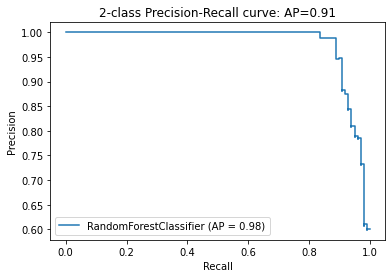

In [ ]:
PrecisionRecallCurve(Y_test,ypred,goal)

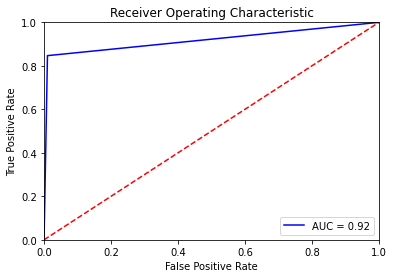

In [ ]:
roccurve(Y_test,ypred)

In [ ]:
#Gaussian Classifier (Naive Bayes)

from sklearn.naive_bayes import GaussianNB

diggers = GaussianNB()
diggers.fit(X_train,Y_train)
ypred = diggers.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, ypred))

Accuracy: 0.8578680203045685


Average precision-recall score: 0.84


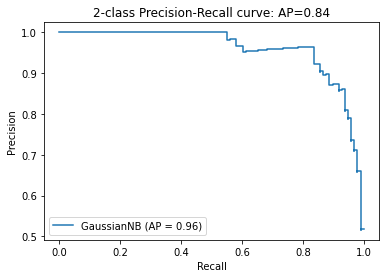

In [ ]:
PrecisionRecallCurve(Y_test,ypred,diggers)

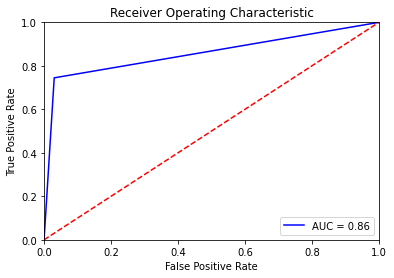

In [ ]:
roccurve(Y_test,ypred)

In [ ]:
#Decision Tree Classifier
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
Gtree = DecisionTreeClassifier()
Gtree = Gtree.fit(X_train, Y_train)

ypred = Gtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, ypred))

Accuracy: 0.9035532994923858


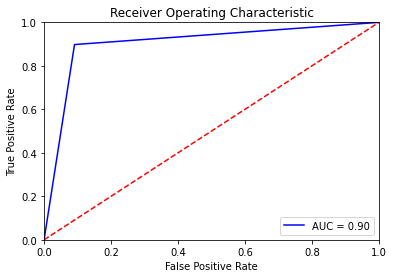

In [ ]:
roccurve(Y_test,ypred)

Average precision-recall score: 0.87


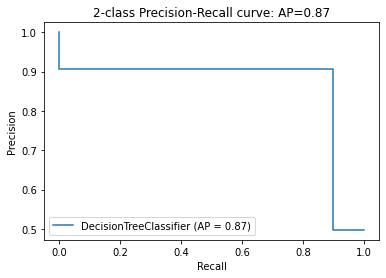

In [ ]:
PrecisionRecallCurve(Y_test,ypred,Gtree)

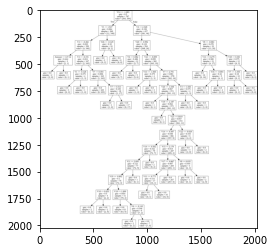

In [ ]:
credit_card_data = tree.export_graphviz(Gtree, out_file=None, feature_names=["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"])
graph = pydotplus.graph_from_dot_data(credit_card_data)
graph.write_png('decisiontree_creditcard.png')


img=pltimg.imread('decisiontree_creditcard.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Linear Kernel SVM Classifier
from sklearn.svm import SVC
sv1 = SVC(kernel = "linear")
sv1.fit(X_train,Y_train)
ypred = sv1.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,ypred))
print(classification_report(Y_test,ypred))

[[97  2]
 [17 81]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        99
           1       0.98      0.83      0.90        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



Average precision-recall score: 0.89


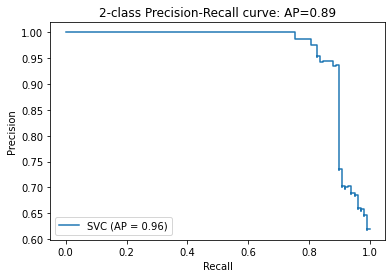

In [ ]:
PrecisionRecallCurve(Y_test,ypred,sv1)

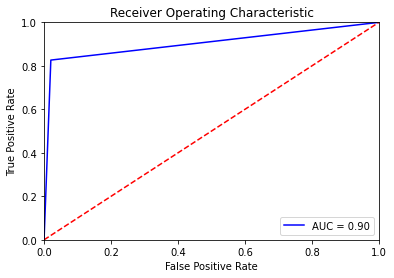

In [ ]:
roccurve(Y_test,ypred)